In [1]:
import pandas as pd
from IPython.display import HTML, display
pd.set_option('display.max_columns', None)

In [2]:
merged_df = pd.read_csv('data/full_balanced_sessions.csv').drop('Unnamed: 0',axis=1)
merged_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_category,event_action,event_label,event_value,event_target
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,sub_page_view,sub_landing,NaN,NaN,False
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,sub_page_view,sub_landing,NaN,NaN,False
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,sub_page_view,sub_landing,NaN,NaN,False
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN,False
4,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,8966663320666986293.1625380661.1625380661,2.087714e+09,2021-07-04,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,eimRuUrNhZLAYcwRrNXu,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg,sub_button_click,sub_custom_question_submit_click,KclpemfoHstknWHFiLit,NaN,True
166322,8972320338067870988.1636586764.1636586764,2.089031e+09,2021-11-11,02:26:04,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,414x896,Safari,Russia,Moscow,sub_button_click,sub_custom_question_submit_click,NaN,NaN,True
166323,9021350361866892945.1634399894.1634399894,2.100447e+09,2021-10-16,18:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x869,Chrome,Russia,Makhachkala,sub_button_click,sub_custom_question_submit_click,KclpemfoHstknWHFiLit,NaN,True
166324,9022928856831816987.1628763425.1628763425,2.100814e+09,2021-08-12,13:00:00,1,XiUifkjKLLnomcDRhswp,clicks,TIRYvHSoLonAvRZefPmz,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,360x640,Chrome,Russia,Lipetsk,sub_button_click,sub_custom_question_submit_click,KclpemfoHstknWHFiLit,NaN,True


In [3]:
merged_df.corr()

C:\Users\Nik\AppData\Local\Temp\ipykernel_14832\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,client_id,visit_number,event_value,event_target
client_id,1.000000,0.043959,NaN,-0.126184
visit_number,0.043959,1.000000,NaN,0.095042
event_value,NaN,NaN,NaN,NaN
event_target,-0.126184,0.095042,NaN,1.000000


# Бренд и модель - очистка


In [4]:
def print_columns_with_skipped_values(df):
    skipped_values_in_percents = ((df.isna().sum() / len(df)) * 100).sort_values()
    display(skipped_values_in_percents[skipped_values_in_percents > 0.0])
    return skipped_values_in_percents[skipped_values_in_percents > 0.0].index.tolist()

In [5]:
print_columns_with_skipped_values(merged_df)

utm_source         0.006614
event_label       10.979041
utm_campaign      13.699001
utm_adcontent     17.262485
device_brand      22.491372
device_os         62.476702
utm_keyword       62.746654
device_model      99.243053
event_value      100.000000
dtype: float64

['utm_source',
 'event_label',
 'utm_campaign',
 'utm_adcontent',
 'device_brand',
 'device_os',
 'utm_keyword',
 'device_model',
 'event_value']

# Замена и удаление неверных значений

In [6]:
merged_df.loc[merged_df['device_brand'].isna(),'device_brand'] = 'unknown'
merged_df['device_os'] = merged_df['device_os'].fillna('unknown')
merged_df.loc[merged_df['device_os'].str.contains('not set'),'device_os'] = 'unknown'
merged_df['device_os'].unique()

array(['Android', 'unknown', 'iOS', 'Windows', 'Linux', 'Macintosh'],
      dtype=object)

In [7]:
merged_df=merged_df.drop(['device_model'], axis=1)

## Utm - очистка

In [8]:
merged_df.loc[merged_df['utm_source'].isna(),'utm_source'] = 'unknown'
merged_df.loc[merged_df['utm_campaign'].isna(),'utm_campaign'] = 'unknown'
merged_df.loc[merged_df['utm_adcontent'].isna(),'utm_adcontent'] = 'unknown'


merged_df=merged_df.drop(['utm_keyword'], axis=1)

merged_df.loc[merged_df['utm_medium'].str.contains('\(no'), 'utm_medium'] = 'none'

## Очистка данных

merged_df.info()

# Удаление категории и типа события/действия

In [9]:
merged_df = merged_df.drop(['event_label','event_value'], axis=1)

In [10]:
merged_df = merged_df.drop(['event_category','event_action'], axis=1)

## Очистка данных - удаление неинформативных данных

In [11]:
list_columns_with_skipped_values = print_columns_with_skipped_values(merged_df)

Series([], dtype: float64)

In [12]:
merged_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_target
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,False
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,False
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,False
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,Russia,Moscow,False
4,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,Russia,Saint Petersburg,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,8966663320666986293.1625380661.1625380661,2.087714e+09,2021-07-04,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,eimRuUrNhZLAYcwRrNXu,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Samsung,360x640,Chrome,Russia,Saint Petersburg,True
166322,8972320338067870988.1636586764.1636586764,2.089031e+09,2021-11-11,02:26:04,1,fDLlAcSmythWSCVMvqvL,none,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,True
166323,9021350361866892945.1634399894.1634399894,2.100447e+09,2021-10-16,18:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Samsung,412x869,Chrome,Russia,Makhachkala,True
166324,9022928856831816987.1628763425.1628763425,2.100814e+09,2021-08-12,13:00:00,1,XiUifkjKLLnomcDRhswp,clicks,TIRYvHSoLonAvRZefPmz,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Xiaomi,360x640,Chrome,Russia,Lipetsk,True


# Удаляем столбцы с айди

In [13]:
merged_df = merged_df.drop(['session_id','client_id'], axis=1)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   visit_date                166326 non-null  object
 1   visit_time                166326 non-null  object
 2   visit_number              166326 non-null  int64 
 3   utm_source                166326 non-null  object
 4   utm_medium                166326 non-null  object
 5   utm_campaign              166326 non-null  object
 6   utm_adcontent             166326 non-null  object
 7   device_category           166326 non-null  object
 8   device_os                 166326 non-null  object
 9   device_brand              166326 non-null  object
 10  device_screen_resolution  166326 non-null  object
 11  device_browser            166326 non-null  object
 12  geo_country               166326 non-null  object
 13  geo_city                  166326 non-null  object
 14  even

In [15]:
merged_df = merged_df.drop_duplicates()
merged_df.shape

(93461, 15)

In [16]:
print_columns_with_skipped_values(merged_df)

Series([], dtype: float64)

[]

# Преобразование данных

## Даты и время


In [17]:
from datetime import datetime
import re


HOUR_PATTERN = re.compile('(\d\d):\d\d:\d\d')

def extract_hour(timestr):
    groups = HOUR_PATTERN.findall(timestr)
    if len(groups) > 0:
        hour = int(groups[0])
    else:
        hour = None
    return hour



DATE_FORMAT = '%Y-%m-%d'

def extract_year(date_str):
    date = datetime.strptime(date_str, DATE_FORMAT)
    return date.year

def extract_month(date_str):
    date = datetime.strptime(date_str, DATE_FORMAT)
    return date.month

def extract_day(date_str):
    date = datetime.strptime(date_str, DATE_FORMAT)
    return date.day

def extract_day_of_week(date_str):
    date = datetime.strptime(date_str, DATE_FORMAT)
    return date.weekday()

merged_df['visit_hour'] = merged_df.apply(lambda row: extract_hour(row['visit_time']),axis=1)
merged_df['visit_year'] = merged_df.apply(lambda row: extract_year(row['visit_date']),axis=1)
merged_df['visit_month'] = merged_df.apply(lambda row: extract_month(row['visit_date']),axis=1)
merged_df['visit_day'] = merged_df.apply(lambda row: extract_day(row['visit_date']),axis=1)
merged_df['visit_day_of_week'] = merged_df.apply(lambda row: extract_day_of_week(row['visit_date']),axis=1)

merged_df = merged_df.drop(['visit_date','visit_time'],axis=1)
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_target,visit_hour,visit_year,visit_month,visit_day,visit_day_of_week
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,False,14,2021,11,24,2
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,False,8,2021,11,14,6
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,False,2,2021,12,28,1
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,Russia,Moscow,False,5,2021,5,29,5
4,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,Russia,Saint Petersburg,False,12,2021,5,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,24,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,True,22,2021,11,6,5
164595,26,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,True,12,2021,11,8,0
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Android,Xiaomi,360x720,Chrome,Russia,Moscow,True,13,2021,12,20,0
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Huawei,360x800,Opera,Russia,Moscow,True,11,2021,9,29,2


In [18]:
merged_df = merged_df.drop('visit_year',axis=1)

# Гео данные (зачеркнуто)

geolist_df = pd.read_csv('extra_data/full_geo_list.csv')

merged_df

In [19]:
merged_df['place'] = merged_df.apply(lambda row: row['geo_country'].lower().replace(' ','_') + '_' + row['geo_city'].lower().replace(' ','_'), axis=1) # + '_' + row['geo_city'].lower(), axis=1)
# merged_df = merged_df.drop(['geo_country','geo_city'],axis=1)
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,place
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,False,14,11,24,2,russia_zlatoust
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,False,8,11,14,6,russia_moscow
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,False,2,12,28,1,russia_krasnoyarsk
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,Russia,Moscow,False,5,5,29,5,russia_moscow
4,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,Russia,Saint Petersburg,False,12,5,31,0,russia_saint_petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,24,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,True,22,11,6,5,russia_saint_petersburg
164595,26,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,True,12,11,8,0,russia_saint_petersburg
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Android,Xiaomi,360x720,Chrome,Russia,Moscow,True,13,12,20,0,russia_moscow
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Huawei,360x800,Opera,Russia,Moscow,True,11,9,29,2,russia_moscow


In [20]:
merged_df = merged_df.drop(['geo_country','geo_city'],axis=1)
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,place
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,14,11,24,2,russia_zlatoust
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,False,8,11,14,6,russia_moscow
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,2,12,28,1,russia_krasnoyarsk
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,False,5,5,29,5,russia_moscow
4,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,False,12,5,31,0,russia_saint_petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,24,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,22,11,6,5,russia_saint_petersburg
164595,26,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,12,11,8,0,russia_saint_petersburg
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Android,Xiaomi,360x720,Chrome,True,13,12,20,0,russia_moscow
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Huawei,360x800,Opera,True,11,9,29,2,russia_moscow


In [21]:
merged_df = merged_df.drop(merged_df[merged_df['place'].str.contains('not')].index)

In [22]:
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,place
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,14,11,24,2,russia_zlatoust
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,False,8,11,14,6,russia_moscow
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,2,12,28,1,russia_krasnoyarsk
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,False,5,5,29,5,russia_moscow
4,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,False,12,5,31,0,russia_saint_petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,24,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,22,11,6,5,russia_saint_petersburg
164595,26,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,12,11,8,0,russia_saint_petersburg
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Android,Xiaomi,360x720,Chrome,True,13,12,20,0,russia_moscow
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Huawei,360x800,Opera,True,11,9,29,2,russia_moscow


In [23]:
geolist_df = pd.read_csv('extra_data/full_geo_list.csv')
geolist_df['Place'] = geolist_df.apply(lambda row: row['Place'].lower().replace(',','_'), axis=1)

def get_coords(place): # -> Lat, Long
    place_view = geolist_df[geolist_df['Place'] == place]
    if len(place_view) >= 1:
        first = place_view.iloc[0]
        return first['geo_lat'], first['geo_long']
    else:
        return None, None
    
    
merged_df['geo_lat'] = merged_df.apply(lambda row: get_coords(row['place'])[0], axis=1)
merged_df['geo_long'] = merged_df.apply(lambda row: get_coords(row['place'])[1], axis=1)
merged_df = merged_df.drop('place', axis=1)
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,geo_lat,geo_long
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,14,11,24,2,55.167421,59.679263
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,False,8,11,14,6,55.750446,37.617494
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,False,2,12,28,1,56.009097,92.872515
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,unknown,Xiaomi,393x786,Chrome,False,5,5,29,5,55.750446,37.617494
4,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,Apple,375x812,Safari,False,12,5,31,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164594,24,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,22,11,6,5,NaN,NaN
164595,26,iNFgfQPqHPBuvGCYtrQE,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,True,12,11,8,0,NaN,NaN
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Android,Xiaomi,360x720,Chrome,True,13,12,20,0,55.750446,37.617494
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,unknown,Huawei,360x800,Opera,True,11,9,29,2,55.750446,37.617494


In [24]:
def get_coords(place): # -> Lat, Long
    place_view = geolist_df[geolist_df['Place'] == place]
    if len(place_view) >= 1:
        first = place_view.iloc[0]
        return first['geo_lat'], first['geo_long']
    else:
        return None, None

#.iloc[0]

In [25]:
merged_df = merged_df.drop(merged_df[merged_df.geo_lat.isna()].index)

# Данные об устройствах

# Преобразование разрешения экрана  (Width X Height)


In [26]:
def extract_width(res_str):
    wharr = res_str.split('x')
    if len(wharr) == 2:
        return wharr[0]
    else:
        return None
    
def extract_height(res_str):
    wharr = res_str.split('x')
    if len(wharr) == 2:
        return wharr[1]
    else:
        return None

In [27]:
merged_df['screen_width'] = merged_df.apply(lambda row: extract_width(row['device_screen_resolution']), axis=1)
merged_df['screen_height'] = merged_df.apply(lambda row: extract_height(row['device_screen_resolution']), axis=1)
merged_df = merged_df.drop(['device_screen_resolution'],axis=1)

merged_df['screen_width'] = pd.to_numeric(merged_df['screen_width'], downcast='integer')
merged_df['screen_height'] = pd.to_numeric(merged_df['screen_height'], downcast='integer')

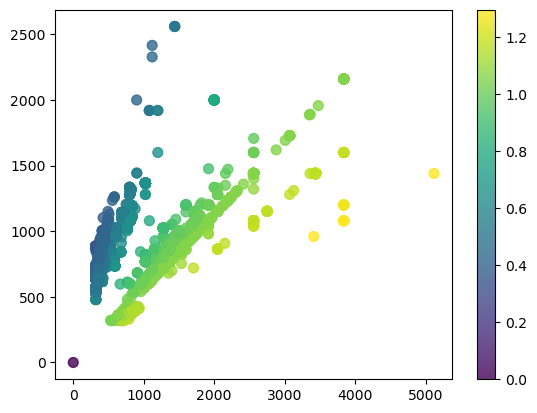

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x = merged_df['screen_width']
y = merged_df['screen_height']
colour = np.arctan2(x, y)
plt.scatter(x, y, s = 50, c = colour, alpha = 0.8)
plt.colorbar()
plt.show()

In [29]:
merged_df = merged_df.drop(['device_os'],axis=1)

# Удаление колонок с избыточным количеством значений

In [30]:
def print_len_of_column_values(col):
    print(f'{col} {len(merged_df[col].unique())}')

In [31]:
print_len_of_column_values('utm_source')

utm_source 124


In [32]:
print_len_of_column_values('utm_medium')

utm_medium 37


In [33]:
print_len_of_column_values('utm_campaign')

utm_campaign 249


In [34]:
print_len_of_column_values('utm_adcontent')

utm_adcontent 137


In [35]:
# merged_df = merged_df.drop(['utm_campaign','utm_adcontent'],axis=1)

In [36]:
# merged_df.to_csv('data/balanced_full_prepared.csv')

# Нормализация геоданных

from sklearn.preprocessing import MinMaxScaler

ll_df = merged_df[['geo_lat','geo_long']]
ll_df
mm_scaler = MinMaxScaler()
mm_scaler.fit(ll_df)
mm_scaled = mm_scaler.transform(ll_df)


merged_df[['lat_mm','long_mm']] = mm_scaled

merged_df = merged_df.drop(['geo_lat','geo_long'], axis=1)

# merged_df.to_csv('processed_data/prepared_balanced_sample_before_featuring.csv')

# Создание фич
# Преобразование данных в категориальный тип


In [37]:
column_names = merged_df.columns.tolist()
for column in column_names:
    display(f'------ {column} ------')
    display(merged_df[column].unique())
    display(merged_df[column].nunique())

'------ visit_number ------'

array([  1,   2,   3,   4,   5,   6,  10,   7,   8,   9,  11,  18,  19,
        21,  24,  25,  26,  28,  13,  14,  17,  20,  22,  12,  15,  16,
        23,  36,  39,  40,  43,  45,  46,  47,  49,  50,  51,  52,  53,
        56,  57,  58,  59,  60,  62,  63,  27,  29,  30,  32,  33,  35,
        44,  48,  41,  42,  31,  66,  68,  74,  71,  37,  38,  77,  69,
        64,  67, 123, 125, 172, 174, 176, 186, 203, 234, 235, 237, 251,
       304, 148,  75,  76,  97,  70,  80,  65, 141, 143, 145, 146,  83,
        73,  98, 132, 157, 196, 238, 249,  34, 122, 177,  96, 112, 130,
       261,  79,  81,  84, 106,  54,  82,  88,  94, 110, 284,  55, 201,
       232, 311, 321, 323,  87,  90, 165, 179, 210, 236,  85,  86,  92,
       103, 114, 115, 164, 166, 168, 171, 183, 104, 129, 217, 218, 100,
       105, 109, 202, 263,  61, 308, 101, 117, 128, 136, 139, 142, 153,
       156, 159, 155, 161, 163, 170, 211, 212, 214, 220, 222, 224, 244,
       246, 247, 267, 275, 277, 280, 290, 294, 296, 300, 302, 31

362

'------ utm_source ------'

array(['ZpYIoDJMcFzVoPFsHGJL', 'MvfHsxITijuriZxsqZqt',
       'kjsLglQLzykiRbcDiGcD', 'gVRrcxiDQubJiljoTbGm',
       'BHcvLfOaCWvWTykYqHVe', 'fDLlAcSmythWSCVMvqvL',
       'klTrhUaShgnjIbaPmqjc', 'ghoaGAksqhKomdFrxgyJ',
       'nSReTmyFtbSjlPrTKoaX', 'hTjLvqNxGggkGnxSCaTm',
       'IZEXUFLARCUMynmHNBGo', 'bByPQxmDaMXgpHeypKSM',
       'ISrKoXQCxqqYvAZICvjs', 'jaSOmLICuBzCFqHfBdRg',
       'PlbkrSYoHuZBWfYjYnfw', 'gDBGzjFKYabGgSPZvrDH',
       'NGNkCWwKgYFmiCCeZVxg', 'QxAxdyPLuQMEcrdZWdWb',
       'oZCzWSykfixnjMPDNjSU', 'vFcAhRxLfOWKhvxjELkx',
       'aXQzDWsJuGXeBXexNHjc', 'fbFKcMumlScApQMqFIqp',
       'ZHCJROlbqnkXTqIuVxnm', 'iNFgfQPqHPBuvGCYtrQE',
       'cAqxcRdSSFAyCPUxQHqy', 'DnEUulZAecfGPvdtZBYS',
       'eLzNJHzPelJpEyBwMrKo', 'FTAuYVNoYYxgvKMpKSLW',
       'geDcueAOghDzHkGMmdOq', 'PKriXrefSFPLBYtCRGSE',
       'NwuIyBhuPCXhJVPLtXCC', 'TxKUcPpthBDPieTGmVhx',
       'LlBOVIARRTjfgnQNjJre', 'TTtiRKFZIaQpIWggfCoF',
       'KgicpPxiEQfzPlPwQZJq', 'RVKHNCFOYpjJjjAtwCgE',
       'Gm

124

'------ utm_medium ------'

array(['banner', 'cpm', 'cpc', 'referral', 'none', 'stories',
       'blogger_channel', 'blogger_stories', 'email', 'organic', 'push',
       'cpv', 'tg', 'info_text', 'post', 'smartbanner', 'clicks',
       'outlook', 'cpa', 'landing', 'partner', 'blogger_header', 'smm',
       'qr', 'google_cpc', 'app', 'vk_smm', 'Sbol_catalog', 'sms',
       'landing_interests', 'yandex_cpc', 'medium', 'fb_smm', 'link',
       'CPM', 'dom_click', 'social'], dtype=object)

37

'------ utm_campaign ------'

array(['LEoPHuyFvzoNfnzGgfcd', 'FTjNLDyTrXaWYgZymFkV', 'unknown',
       'LTuZkdKfxRGVceoWkVyg', 'gecBYcKZCPMcVYdSSzKP',
       'eimRuUrNhZLAYcwRrNXu', 'LwJZxKuWmvOhPsaCeRjG',
       'zxoiLxhuSIFrCeTLQVWZ', 'nSReTmyFtbSjlPrTKoaX',
       'BVKxkCOHKUOvkpbrLMgZ', 'QEejXfOCtOMFLZqIPApp',
       'XHNUiSKKGTEpSAlaVMFQ', 'foFTSdUvNqqkPzZvgiqt',
       'BAZCuyHZnaPrMGOMrcCQ', 'bxOTvPtyGSdUrbwoXCPO',
       'DXVdsSTQphSYVmRchYKt', 'JwYIveaHVpeeRZloQCfF',
       'UvuMsOSDBWQGOIbDbXfV', 'RoDitORHdzGfGhNCyEMy',
       'sbJRYgVfvcnqKJNDDYIr', 'PXQWdUxeUoXfoKzTBGpY',
       'EvhrtRzIJnQYHziPiLzV', 'AqudXfUnmXWSDWVGYaXr',
       'RxecHElWobBxIeAkqFXV', 'hkvDVxqLOzGjGaoNiNzN',
       'QdLfySaGXolfTBSNVfHn', 'okTXSMadDkjvntEHzIjp',
       'ULAUPJGgNiZYQgwZwZGR', 'MXqmDyetMTICSSitTjWV',
       'gVwpGdJDpteNmFIatPTG', 'zfwIehuEfWYdYrEZgRLo',
       'wpmatvDuiMutnvmNVPJo', 'zPJpddwzkFqLMSYgtDqy',
       'vXsFkagGabkcWKlgLzSg', 'uZlTllnydJIwxWaShyFN',
       'IZEXUFLARCUMynmHNBGo', 'CdkIkBrvEVomSgvHzYvj',

249

'------ utm_adcontent ------'

array(['vCIpmpaGBnIQhyYNkXqp', 'xhoenQgDQsgfEPYNPwKO',
       'NOBKLgtuvqYWkXQHeYWM', 'JNHcPlZPxEMWDnRiyoBf', 'unknown',
       'NhvfEqcSTGEZKxxvUZlj', 'DZYjhfIUfdqhfuTNUmjn',
       'TuyPWsGQruPMpKvRxeBF', 'PkybGvWbaqORmxjNunqZ',
       'UxrnyMlRBSOhOjytXnMG', 'xnyHaukLtAvgViiZSyBC',
       'XKsYZiUFcdkUXQpoLKyS', 'BdalQBXFeDGQTswaQtOL',
       'SOkCdPxfUcZUzzOdgGES', 'LLfCasrxQzJIyuldcuWy',
       'AdeErYgVTbRcAWtHrMHq', 'lBvcHmZkKpwCXdgWSQYO',
       'aYAcKhelKzYpXrRYknSP', 'nVzhCFmVaYpYhZVYHRhn',
       'dUuXlWzvmhDSyclWRhNP', 'OJiWyBKOyDITzXCZRSMH',
       'qhEmhjPXvwgEHdBikgEQ', 'XSkXBCPfnJjvxbfeewtd',
       'SAVVWaMghGnnvPOqMOIt', 'EteMoEECGsaJeMnuvAZD',
       'WYLajZgbUhGimwBKDZUH', 'YTDFqIabKsQVGozQYoPf',
       'nNqUcgFgcqQbTVSvgaHr', 'vilbbyUvEWbiJvxXpaNN',
       'LcGIUNPUAmXtQJaDfFBR', 'yEzOkUNmavmsRTXaISLf',
       'qalfRbxdosSpdWRPPVpn', 'twlfGCnyRPFtCeUKaust',
       'IwBedorwDIzxDRIZUTNo', 'QXCBxPuOCSEEHrqrweFV',
       'guyNoEvzgofQvvwExGOq', 'NNFDaOyxNbRfjYvClLnM',

137

'------ device_category ------'

array(['mobile', 'desktop', 'tablet'], dtype=object)

3

'------ device_brand ------'

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'unknown', 'Vivo', 'Meizu',
       '(not set)', 'Realme', 'OPPO', 'OnePlus', 'itel', 'Philips',
       'Alcatel', 'LG', 'BQ', 'Infinix', 'Asus', 'Wiko', 'Nokia',
       'Google', 'ZTE', 'Lenovo', 'Blackview', 'Sony', 'Oukitel',
       'Motorola', 'HOMTOM', 'Cubot', 'DOOGEE', 'China Phone', 'DEXP',
       'Tecno', 'Neffos', 'TP-Link', 'Hisense', 'Acer', 'Vsmart',
       'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen', 'Ulefone',
       'Symphony', 'LeEco', 'Prestigio', 'POCO', 'Guophone', 'HTC',
       'Vertex', 'CAT', 'InFocus', 'TCL', 'SonyEricsson', 'Inoi', 'Nomu',
       'Micromax', 'Jiake', 'Kyocera', 'Mozilla', 'iNew', 'Sharp', 'MTC',
       'Teclast', 'Vernee', 'Karbonn', 'Razer', 'Haier', 'AGM', 'Motive',
       'Black Fox', 'Vertu', 'Wileyfox', 'Celkon'], dtype=object)

74

'------ device_browser ------'

array(['Chrome', 'Samsung Internet', 'Safari', 'Android Webview',
       'Safari (in-app)', 'YaBrowser', 'Opera', 'Firefox', 'Edge',
       'UC Browser', '(not set)', 'Android Runtime', 'Mozilla', 'Coc Coc',
       'MRCHROME', 'Mozilla Compatible Agent', 'Puffin', 'Maxthon'],
      dtype=object)

18

'------ event_target ------'

array([False,  True])

2

'------ visit_hour ------'

array([14,  8,  2,  5, 16,  9, 21, 13, 15, 17, 18,  7, 23,  0, 22, 11, 12,
        4,  1, 19, 20, 10,  3,  6], dtype=int64)

24

'------ visit_month ------'

array([11, 12,  5,  6,  8, 10,  9,  7], dtype=int64)

8

'------ visit_day ------'

array([24, 14, 28, 29,  3, 27, 20,  2,  1,  5, 12, 21,  8, 10,  9, 17, 22,
       16, 26, 11, 19, 23, 30,  4,  6, 31, 18,  7, 13, 15, 25],
      dtype=int64)

31

'------ visit_day_of_week ------'

array([2, 6, 1, 5, 4, 3, 0], dtype=int64)

7

'------ geo_lat ------'

array([ 55.1674213 ,  55.7504461 ,  56.0090968 ,  43.5854823 ,
        57.6263877 ,  55.9094928 ,  44.7239578 ,  55.8036225 ,
        56.0104274 ,  43.1150678 ,  56.3962287 ,  46.3498308 ,
        55.7622453 ,  55.7823547 ,  54.3107593 ,  54.1930321 ,
        56.839104  ,  47.2213858 ,  53.198627  ,  55.4368213 ,
        56.6328248 ,  55.1598408 ,  55.8217545 ,  45.0352718 ,
        52.6041877 ,  55.8394789 ,  51.719079  ,  54.6295687 ,
        57.153534  ,  54.991375  ,  53.6863763 ,  54.9155247 ,
        51.530018  ,  43.3197031 ,  51.767452  ,  61.254032  ,
        50.4500336 ,  48.7081906 ,  55.954618  ,  48.481403  ,
        54.7261409 ,  55.0282171 ,  58.6035661 ,  54.5101087 ,
        60.709217  ,  53.347402  ,  40.3570373 ,  52.72879   ,
        53.9024716 ,  56.858675  ,  44.4970713 ,  57.7679158 ,
        54.360799  ,  54.886598  ,  51.739433  ,  44.039775  ,
        56.866557  ,  52.033409  ,  44.2285229 ,  50.290527  ,
        65.5831187 ,  55.0951738 ,  50.5955595 ,  51.66

652

'------ geo_long ------'

array([ 5.96792625e+01,  3.76174943e+01,  9.28725147e+01,  3.97231090e+01,
        3.98933705e+01,  3.77339358e+01,  3.77690711e+01,  3.79646488e+01,
        3.78461892e+01,  1.31885577e+02,  3.87111103e+01,  4.80326203e+01,
        3.78565550e+01,  4.91242266e+01,  4.83642771e+01,  3.76175400e+01,
        6.06082500e+01,  3.97114196e+01,  5.01139870e+01,  3.77680693e+01,
        4.78972462e+01,  6.14025547e+01,  3.73400897e+01,  3.89764814e+01,
        3.95936899e+01,  3.71770987e+01,  9.44300679e+01,  3.97425039e+01,
        6.55422740e+01,  7.33715290e+01,  8.80703443e+01,  3.74195533e+01,
        4.60346830e+01,  4.56934308e+01,  5.50971180e+01,  7.33964000e+01,
        3.05241361e+01,  4.45153353e+01,  3.80567691e+01,  1.35076935e+02,
        5.59474990e+01,  8.29234509e+01,  4.96666241e+01,  3.62598115e+01,
        2.87440510e+01,  8.37784496e+01,  1.81718482e+01,  4.14553600e+01,
        2.75618225e+01,  3.59208284e+01,  3.41586871e+01,  4.09269141e+01,
        2.13054607e+01,  

652

'------ screen_width ------'

array([ 360,  385,  393,  390,  412,  384, 1536,  375,  339,  414, 1920,
       1280,  834, 1680, 1024, 1366,  846,  320,  800,  428, 1440, 2560,
        424,  720, 2000,  780, 1600, 2048,  768,  851, 1333,  869, 3840,
       1007,  914, 1528, 2172,  501,  420,  463, 1792,  760,  534,  491,
       1760, 3440,  915, 1067, 1728,  640, 1400,  873,  450, 1093,  432,
        694,  600,  786,  396,  395,  789,  962, 1524,  892, 1290,  601,
        810, 1364, 1098,  820,  400, 2240,  377,  569,  712, 1152, 1368,
        830,  854,  740,  732, 1360,  879, 1138,  480, 1450, 1707,  455,
        976, 2160, 1235, 1467, 1344, 1410, 1412,  343,  772, 1455,  421,
       3072,  486,  686,  960,  347,  328,  770,  451,  344,  392, 1970,
        753, 1177,  431,  485,  376, 1746, 1179, 3360,  391,  674,  353,
        363,  769, 1500, 1194,  321,  493, 1595,  676, 1372,  378,  857,
        418,  683, 1348,  346,  818,  590, 2152,  878, 2195,  361, 1000,
        441, 1012, 1739,  610,  381, 1334, 1825, 23

307

'------ screen_height ------'

array([ 720,  854,  786,  844,  915,  869,  851,  864,  699,  667,  812,
        892,  640,  716,  896,  873,  800,  744, 1080,  760,  780,  736,
       1112, 1050,  846,  820,  830,  768,  412,  658,  360,  740,  926,
       1200,  833,  900,  747,  732, 1024,  771, 1440,  568,  848,  770,
        858,  569,  534, 2000,  872,  813,  867,  842, 1152,  393,  750,
        570,  942, 2160,  601,  548,  859, 1222,  712,  694, 1086,  933,
       1040,  817,  693, 1002, 1120,  665,  753,  676,  982,  749,  883,
        775,  748,  960,  990,  938,  772, 1064,  600,  811,  845, 1000,
        918,  876,  735,  320,  615,  832,  756,  705,  824,  855,  329,
        860,  962, 1198,  808,  895,  785,  618,  686, 1180,  906,  734,
        778, 1260,  670,  804, 1600, 1400,  790,  823,  920, 1138,  912,
        880, 1366, 1194,  384,  385,  550, 1067,  879,  816,  809,  610,
        917,  840,  614,  940,  752,  795, 1019,  886, 1091,  911, 1728,
       1052,  792, 1098,  818,  822, 1280,  899,  5

364

In [38]:
merged_df['event_target'] = merged_df['event_target'].astype('bool')

merged_df['event_target'] = merged_df['event_target'].replace({True: 1, False: 0})
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,geo_lat,geo_long,screen_width,screen_height
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,0,14,11,24,2,55.167421,59.679263,360,720
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,0,8,11,14,6,55.750446,37.617494,385,854
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,0,2,12,28,1,56.009097,92.872515,360,720
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,0,5,5,29,5,55.750446,37.617494,393,786
6,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,Safari,0,16,12,3,4,55.750446,37.617494,390,844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163155,1,ISrKoXQCxqqYvAZICvjs,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari (in-app),1,22,11,3,2,54.726141,55.947499,428,926
163183,1,fDLlAcSmythWSCVMvqvL,none,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Vivo,Android Webview,1,13,11,8,0,45.035272,38.976481,360,760
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Xiaomi,Chrome,1,13,12,20,0,55.750446,37.617494,360,720
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,Huawei,Opera,1,11,9,29,2,55.750446,37.617494,360,800


In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74032 entries, 0 to 165034
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visit_number       74032 non-null  int64  
 1   utm_source         74032 non-null  object 
 2   utm_medium         74032 non-null  object 
 3   utm_campaign       74032 non-null  object 
 4   utm_adcontent      74032 non-null  object 
 5   device_category    74032 non-null  object 
 6   device_brand       74032 non-null  object 
 7   device_browser     74032 non-null  object 
 8   event_target       74032 non-null  int64  
 9   visit_hour         74032 non-null  int64  
 10  visit_month        74032 non-null  int64  
 11  visit_day          74032 non-null  int64  
 12  visit_day_of_week  74032 non-null  int64  
 13  geo_lat            74032 non-null  float64
 14  geo_long           74032 non-null  float64
 15  screen_width       74032 non-null  int16  
 16  screen_height      74

In [40]:
CATEGORY_COLUMNS = list(merged_df.select_dtypes(include=['object']).columns) #['utm_campaign','utm_adcontent','utm_source','utm_medium','device_category','device_os','device_brand','device_browser', 'place'] #'geo_country'] #,]

for col in CATEGORY_COLUMNS:
    merged_df[col] = merged_df[col].astype("category")
    
merged_df

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,geo_lat,geo_long,screen_width,screen_height
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,0,14,11,24,2,55.167421,59.679263,360,720
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,0,8,11,14,6,55.750446,37.617494,385,854
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,0,2,12,28,1,56.009097,92.872515,360,720
3,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,0,5,5,29,5,55.750446,37.617494,393,786
6,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,Safari,0,16,12,3,4,55.750446,37.617494,390,844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163155,1,ISrKoXQCxqqYvAZICvjs,smm,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari (in-app),1,22,11,3,2,54.726141,55.947499,428,926
163183,1,fDLlAcSmythWSCVMvqvL,none,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Vivo,Android Webview,1,13,11,8,0,45.035272,38.976481,360,760
164848,1,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,mobile,Xiaomi,Chrome,1,13,12,20,0,55.750446,37.617494,360,720
164945,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,mobile,Huawei,Opera,1,11,9,29,2,55.750446,37.617494,360,800


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74032 entries, 0 to 165034
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   visit_number       74032 non-null  int64   
 1   utm_source         74032 non-null  category
 2   utm_medium         74032 non-null  category
 3   utm_campaign       74032 non-null  category
 4   utm_adcontent      74032 non-null  category
 5   device_category    74032 non-null  category
 6   device_brand       74032 non-null  category
 7   device_browser     74032 non-null  category
 8   event_target       74032 non-null  int64   
 9   visit_hour         74032 non-null  int64   
 10  visit_month        74032 non-null  int64   
 11  visit_day          74032 non-null  int64   
 12  visit_day_of_week  74032 non-null  int64   
 13  geo_lat            74032 non-null  float64 
 14  geo_long           74032 non-null  float64 
 15  screen_width       74032 non-null  int16   
 16  scr

In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

data_categories = merged_df[CATEGORY_COLUMNS]

ohe.fit(data_categories)

ohe_merged = ohe.transform(data_categories)

# categorial_ohe_df = pd.DataFrame(ohe_merged, columns=ohe.get_feature_names_out(), dtype='int')

# Стандартизация количественных типов

In [44]:
NUMERIC_COLUMNS = list(merged_df.select_dtypes(include=['int64','int16','float64']).columns)
NUMERIC_COLUMNS.remove('event_target')

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
numeric_data = merged_df[NUMERIC_COLUMNS]
std_scaler.fit(numeric_data)
scaled_data = std_scaler.transform(numeric_data)
scaled_data

array([[-0.11623416,  0.06899404,  0.88782757, ...,  0.90716127,
        -0.55695039, -0.8914169 ],
       [-0.11623416, -0.93696689,  0.88782757, ..., -0.36576377,
        -0.51254795,  0.03429621],
       [-0.11623416, -1.94292781,  1.31730496, ...,  2.82235326,
        -0.55695039, -0.8914169 ],
       ...,
       [-0.11623416, -0.09866612,  1.31730496, ..., -0.36576377,
        -0.55695039, -0.8914169 ],
       [-0.06954981, -0.43398643,  0.02887277, ..., -0.36576377,
        -0.55695039, -0.33875236],
       [-0.11623416,  1.07495496,  0.88782757, ..., -0.36576377,
         1.53174026,  0.10337928]])

In [45]:
scaled_num_cols = [f'{col}_std' for col in NUMERIC_COLUMNS]
scaled_num_cols

scaled_numeric_df = pd.DataFrame(scaled_data, columns=scaled_num_cols)
scaled_numeric_df

,visit_number_std,visit_hour_std,visit_month_std,visit_day_std,visit_day_of_week_std,geo_lat_std,geo_long_std,screen_width_std,screen_height_std
0,-0.116234,0.068994,0.887828,0.797070,-0.359551,0.173807,0.907161,-0.556950,-0.891417
1,-0.116234,-0.936967,0.887828,-0.329209,1.654200,0.322919,-0.365764,-0.512548,0.034296
2,-0.116234,-1.942928,1.317305,1.247581,-0.862989,0.389071,2.822353,-0.556950,-0.891417
3,-0.116234,-1.439947,-1.689037,1.360209,1.150762,0.322919,-0.365764,-0.498339,-0.435469
4,-0.116234,0.404314,1.317305,-1.568115,0.647325,0.322919,-0.365764,-0.503667,-0.034787
...,...,...,...,...,...,...,...,...,...
74027,-0.116234,1.410275,0.887828,-1.568115,-0.359551,0.060946,0.691845,-0.436176,0.531694
74028,-0.116234,-0.098666,0.887828,-1.004976,-1.366426,-2.417563,-0.287353,-0.556950,-0.615085
74029,-0.116234,-0.098666,1.317305,0.346558,-1.366426,0.322919,-0.365764,-0.556950,-0.891417
74030,-0.069550,-0.433986,0.028873,1.360209,-0.359551,0.322919,-0.365764,-0.556950,-0.338752


# Заменяем необработанные данные на фичи и стандартизированные количественные значения

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [47]:
merged_df[scaled_num_cols] = scaled_data
merged_df[ohe.get_feature_names_out()] = ohe_merged
merged_df = merged_df.drop(CATEGORY_COLUMNS, axis=1)
merged_df
#merged_df

,visit_number,event_target,visit_hour,visit_month,visit_day,visit_day_of_week,geo_lat,geo_long,screen_width,screen_height,visit_number_std,visit_hour_std,visit_month_std,visit_day_std,visit_day_of_week_std,geo_lat_std,geo_long_std,screen_width_std,screen_height_std,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_ArbfvYgWhqxkzywKqpQf,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_CqeIpFwJscTsZoYXdHsP,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GWZGdHKPgmZPNPwkJshU,utm_source_GkGprIZHXAKqgsyDIvMR,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,utm_source_HbolMJUevblAbkHClEQa,utm_source_IEQWfmbTDVldQVpvhXpz,utm_source_IRGUHqwEMepMjgCYBVRn,utm_source_ISrKoXQCxqqYvAZICvjs,utm_source_IZEXUFLARCUMynmHNBGo,utm_source_InLrxElufkSAvhfyFcOA,utm_source_IsHcZJuNYwanAAEDxuOE,utm_source_JcVHXwVSrnfIuOMMEkrJ,utm_source_KgicpPxiEQfzPlPwQZJq,utm_source_LIWKeifdTCbuNeniIUqm,utm_source_LigOnUObPodLDexszDtn,utm_source_LkGnzVRewoaOHnMCwadT,utm_source_LlBOVIARRTjfgnQNjJre,utm_source_MEitHbTnBcZIHbJvtCyh,utm_source_MYrKypXYDhDVwJMUhCqu,utm_source_MvfHsxITijuriZxsqZqt,utm_source_NCOBaqbWTRpdTXezdNNg,utm_source_NGNkCWwKgYFmiCCeZVxg,utm_source_NTQAiqAhSTbkRRmxVKoQ,utm_source_NwLFDlNWnYxuLZEAZppl,utm_source_NwuIyBhuPCXhJVPLtXCC,utm_source_OtrdXnwzWFjzhNlHVLfd,utm_source_PKriXrefSFPLBYtCRGSE,utm_source_PlbkrSYoHuZBWfYjYnfw,utm_source_PsRRjEPKVbKXDDjZTzqz,utm_source_QKpFeggpjKAvhtjHKHZC,utm_source_QxAxdyPLuQMEcrdZWdWb,utm_source_QzPMrfYhYSLYYPtPaBxI,utm_source_RVKHNCFOYpjJjjAtwCgE,utm_source_RYQFHbWRnjKqraTDuhGb,utm_source_RmEBuqrriAfAVsLQQmhk,utm_source_RxecHElWobBxIeAkqFXV,utm_source_SbQJoCCWibshtEmQeuVM,utm_source_SzZERoLMmrEUEhDaYcyN,utm_source_TTtiRKFZIaQpIWggfCoF,utm_source_TxKUcPpthBDPieTGmVhx,utm_source_UbQpozKfTgYxQovHjkQM,utm_source_UphNUPPFIJLIZnvubKDj,utm_source_VCREhgqUPSUkmfOTvGiW,utm_source_WEXkMlsnJodrzBgKJBpG,utm_source_WeIwsqEbpZGZwhcQktNS,utm_source_WiILFRDQbcHDHNvHzGpX,utm_source_XiUifkjKLLnomcDRhswp,utm_source_XzfzEBYZWgSDtJNXOadn,utm_source_YDhRPNErghvKCwWcfSFO,utm_source_YECMcEASiXejEJmgUmEG,utm_source_YclHumxPxSxgzHfvCaeF,utm_source_YlsczTIyBSwTLNtuDkCd,utm_source_YpBKcihLLfFjWuxOLfvW,utm_source_ZHCJROlbqnkXTqIuVxnm,utm_source_ZSALOpDDuJdQyGxrsDWn,utm_source_ZeHvxPFwjACxsjFESmAv,utm_source_ZpYIoDJMcFzVoPFsHGJL,utm_source_aXQzDWsJuGXeBXexNHjc,utm_source_azajeHUvPOKkHBvWFbjz,utm_source_bByPQxmDaMXgpHeypKSM,utm_source_bgTYkDHjOsJzMUtoGhiQ,utm_source_bxOTvPtyGSdUrbwoXCPO,utm_source_cAqxcRdSSFAyCPUxQHqy,utm_source_dGlVSdmIlgWDyOPjfwwy,utm_source_dyicZQGoeASogoSafjEh,utm_source_eLzNJHzPelJpEyBwMrKo,utm_source_eTMcXJUftGtjDdKkZmfy,utm_source_eimRuUrNhZLAYcwRrNXu,utm_source_fDLlAcSmythWSCVMvqvL,utm_source_fJCYsujgSxIHFbOmgDdN,utm_source_faqsogjxCvbseFqupueU,utm_source_fbFKcMumlScApQMqFIqp,utm_source_fcXWTQaKfxbkBkBnzLhK,utm_source_fgymSoTvjKPEgaIJqsiH,utm_source_gDBGzjFKYabGgSPZvrDH,utm_source_gLXXuZYbFVYlDWhMmZiU,utm_source_gVRrcxiDQubJiljoTbGm,utm_source_geDcueAOghDzHkGMmdOq,utm_source_ghoaGAksqhKomdFrxgyJ,utm_source_hIlpdXTVGwzYWIOqvhtN,utm_source_hONgZhBaHwLGhvJSefNE,utm_source_hTjLvqNxGggkGnxSCaTm,utm_source_hzrqPZyPrRXcOdyjRQRg,utm_source_iNFgfQPqHPBuvGCYtrQE,utm_source_jaSOmLICuBzCFqHfBdRg,utm_source_juYouSPHPfKdXivEPJjt,utm_source_kjsLglQLzykiRbcDiGcD,utm_source_klTrhUaShgnjIbaPmqjc,utm_source_maiZOsuEAMdeoRVsYoFk,utm_source_mtQufDECJCXyKwpKQPvz,utm_source_nSReTmyFtbSjlPrTKoaX,utm_source_ngkgBNjlzLYBofkljaBo,utm_source_nmfptFmSirEqNzAzqbXA,utm_source_nrKihqcWGIzDsOqljdAv,utm_source_oCqKpnSZJeYOVZTgTmKR,utm_source_oZCzWSykfixnjMPDNjSU,utm_source_pvCdohkUBGPPZOsCzVAu,utm_source_qVXuCoVQtPxcUkAXiXBa,utm_source_rGDSdilqpnHoxSsEYvjb,utm_source_rgsINTLYFsElIlfRtNDP,utm_source_tzIeQUUHahhBuEkJqDVp,utm_source_unknown,utm_source_vEBWkLmuIpqNdxZZdlnW,utm_source_vFcAhRxLfOWKhvxjELkx,utm_source_vNNYHvZtTVtJICHsjBBL,utm

In [48]:
merged_df = merged_df.drop(NUMERIC_COLUMNS,axis=1)
merged_df

,event_target,visit_number_std,visit_hour_std,visit_month_std,visit_day_std,visit_day_of_week_std,geo_lat_std,geo_long_std,screen_width_std,screen_height_std,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_ArbfvYgWhqxkzywKqpQf,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_CqeIpFwJscTsZoYXdHsP,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GWZGdHKPgmZPNPwkJshU,utm_source_GkGprIZHXAKqgsyDIvMR,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,utm_source_HbolMJUevblAbkHClEQa,utm_source_IEQWfmbTDVldQVpvhXpz,utm_source_IRGUHqwEMepMjgCYBVRn,utm_source_ISrKoXQCxqqYvAZICvjs,utm_source_IZEXUFLARCUMynmHNBGo,utm_source_InLrxElufkSAvhfyFcOA,utm_source_IsHcZJuNYwanAAEDxuOE,utm_source_JcVHXwVSrnfIuOMMEkrJ,utm_source_KgicpPxiEQfzPlPwQZJq,utm_source_LIWKeifdTCbuNeniIUqm,utm_source_LigOnUObPodLDexszDtn,utm_source_LkGnzVRewoaOHnMCwadT,utm_source_LlBOVIARRTjfgnQNjJre,utm_source_MEitHbTnBcZIHbJvtCyh,utm_source_MYrKypXYDhDVwJMUhCqu,utm_source_MvfHsxITijuriZxsqZqt,utm_source_NCOBaqbWTRpdTXezdNNg,utm_source_NGNkCWwKgYFmiCCeZVxg,utm_source_NTQAiqAhSTbkRRmxVKoQ,utm_source_NwLFDlNWnYxuLZEAZppl,utm_source_NwuIyBhuPCXhJVPLtXCC,utm_source_OtrdXnwzWFjzhNlHVLfd,utm_source_PKriXrefSFPLBYtCRGSE,utm_source_PlbkrSYoHuZBWfYjYnfw,utm_source_PsRRjEPKVbKXDDjZTzqz,utm_source_QKpFeggpjKAvhtjHKHZC,utm_source_QxAxdyPLuQMEcrdZWdWb,utm_source_QzPMrfYhYSLYYPtPaBxI,utm_source_RVKHNCFOYpjJjjAtwCgE,utm_source_RYQFHbWRnjKqraTDuhGb,utm_source_RmEBuqrriAfAVsLQQmhk,utm_source_RxecHElWobBxIeAkqFXV,utm_source_SbQJoCCWibshtEmQeuVM,utm_source_SzZERoLMmrEUEhDaYcyN,utm_source_TTtiRKFZIaQpIWggfCoF,utm_source_TxKUcPpthBDPieTGmVhx,utm_source_UbQpozKfTgYxQovHjkQM,utm_source_UphNUPPFIJLIZnvubKDj,utm_source_VCREhgqUPSUkmfOTvGiW,utm_source_WEXkMlsnJodrzBgKJBpG,utm_source_WeIwsqEbpZGZwhcQktNS,utm_source_WiILFRDQbcHDHNvHzGpX,utm_source_XiUifkjKLLnomcDRhswp,utm_source_XzfzEBYZWgSDtJNXOadn,utm_source_YDhRPNErghvKCwWcfSFO,utm_source_YECMcEASiXejEJmgUmEG,utm_source_YclHumxPxSxgzHfvCaeF,utm_source_YlsczTIyBSwTLNtuDkCd,utm_source_YpBKcihLLfFjWuxOLfvW,utm_source_ZHCJROlbqnkXTqIuVxnm,utm_source_ZSALOpDDuJdQyGxrsDWn,utm_source_ZeHvxPFwjACxsjFESmAv,utm_source_ZpYIoDJMcFzVoPFsHGJL,utm_source_aXQzDWsJuGXeBXexNHjc,utm_source_azajeHUvPOKkHBvWFbjz,utm_source_bByPQxmDaMXgpHeypKSM,utm_source_bgTYkDHjOsJzMUtoGhiQ,utm_source_bxOTvPtyGSdUrbwoXCPO,utm_source_cAqxcRdSSFAyCPUxQHqy,utm_source_dGlVSdmIlgWDyOPjfwwy,utm_source_dyicZQGoeASogoSafjEh,utm_source_eLzNJHzPelJpEyBwMrKo,utm_source_eTMcXJUftGtjDdKkZmfy,utm_source_eimRuUrNhZLAYcwRrNXu,utm_source_fDLlAcSmythWSCVMvqvL,utm_source_fJCYsujgSxIHFbOmgDdN,utm_source_faqsogjxCvbseFqupueU,utm_source_fbFKcMumlScApQMqFIqp,utm_source_fcXWTQaKfxbkBkBnzLhK,utm_source_fgymSoTvjKPEgaIJqsiH,utm_source_gDBGzjFKYabGgSPZvrDH,utm_source_gLXXuZYbFVYlDWhMmZiU,utm_source_gVRrcxiDQubJiljoTbGm,utm_source_geDcueAOghDzHkGMmdOq,utm_source_ghoaGAksqhKomdFrxgyJ,utm_source_hIlpdXTVGwzYWIOqvhtN,utm_source_hONgZhBaHwLGhvJSefNE,utm_source_hTjLvqNxGggkGnxSCaTm,utm_source_hzrqPZyPrRXcOdyjRQRg,utm_source_iNFgfQPqHPBuvGCYtrQE,utm_source_jaSOmLICuBzCFqHfBdRg,utm_source_juYouSPHPfKdXivEPJjt,utm_source_kjsLglQLzykiRbcDiGcD,utm_source_klTrhUaShgnjIbaPmqjc,utm_source_maiZOsuEAMdeoRVsYoFk,utm_source_mtQufDECJCXyKwpKQPvz,utm_source_nSReTmyFtbSjlPrTKoaX,utm_source_ngkgBNjlzLYBofkljaBo,utm_source_nmfptFmSirEqNzAzqbXA,utm_source_nrKihqcWGIzDsOqljdAv,utm_source_oCqKpnSZJeYOVZTgTmKR,utm_source_oZCzWSykfixnjMPDNjSU,utm_source_pvCdohkUBGPPZOsCzVAu,utm_source_qVXuCoVQtPxcUkAXiXBa,utm_source_rGDSdilqpnHoxSsEYvjb,utm_source_rgsINTLYFsElIlfRtNDP,utm_source_tzIeQUUHahhBuEkJqDVp,utm_source_unknown,utm_source_vEBWkLmuIpqNdxZZdlnW,utm_source_vFcAhRxLfOWKhvxjELkx,utm_source_vNNYHvZtTVtJICHsjBBL,utm_source_wlyUPieAGrQNIlkbmySd,utm_source_xQnKzPSrehWizZOmwHkM,utm_source_xlrxvewIthVdRefMQCED,utm_source_ySpK

In [49]:
merged_df.to_csv('processed_data/prepared_featured_balanced_sample_5.csv')